In [15]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sb4
import math
import numpy as np 
from astropy.io import fits
from scipy import interpolate 
import scipy 
import sys
from scipy.ndimage import gaussian_filter1d
from astropy import constants as const
import pylab as plb
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve


file=['oe4v09020_x1d.fits']
date=['FUV']
colors=['royalblue']

for i in np.arange(len(file)):
    x1ddata = fits.getdata(file[i], ext=1)
    norders = len(x1ddata)
    nwavs = len((x1ddata[0]['WAVELENGTH']))
    order = np.arange(norders)
    wave = x1ddata[:]['WAVELENGTH']
    flux = x1ddata[:]['FLUX']
    err = x1ddata[:]['ERROR']

W = (wave[6])
min = 1613
max = 1613.7
wavelength = []
indx1 = []
for j, item in enumerate(W):
    if (item > min).any() and (item < max).any():
        wavelength.append(item)
        indx1.append(j)   
y = indx1
F = (flux[6])
Flux = np.take(F, indx1)
l = np.array(wavelength)
for i in (l):
    observed_lambda = (l*(1e-10))

error = (err[6])
yerr = np.take(error,indx1)

Lambda = np.arange(1613e-10, 1613.7e-10, 1e-14)       
h = 6.62607004*10**-34
k = 1.38e-23
c = 299792458.0
k = 1.38e-23
m = 1.9944235e-26
    

def absorption(lambda0_1, T, N):
    def model(lambda0, A21, g2, g1, N, E1, g1i, g2i, g3i, E1i, E2i, E3i, T):
        energy = []
        E = [E1i, E2i, E3i]
        E = np.array(E)
        gi = [g1i, g2i, g3i]
        gi = np.array(gi)
        kT = ((k*T)/(h*3e10))*1e11
        for j in (E):
            energy.append(np.exp(-j/(kT)))
            e = np.multiply(energy,gi)
            Z = np.sum(e)
            x = (g1i/Z)*(np.exp(-E1i/kT))
            v0 = c/lambda0
            v1 = (c/Lambda)
            for i in (v1):
                diffv = (v0/c)*(math.sqrt((2*k*T)/m))
                d1 = ((diffv)**2)
                q1 = (v1-v0)**2
                a1 = -(q1/d1)
                L = 1/(diffv*(math.sqrt(np.pi)))*(np.exp(a1))
            B1 = (2*h*v0**3)/((c)**2)
            B12 = (A21*(g2/g1))/B1
            Depth = ((h*v0)/(4*math.pi))*x*B12*L
            X = -(Depth*N)
            I = 1e-12*(np.exp(X))
            return(I)
    I1 = model(lambda0_1, 3.6e+04, 1, 3, N, 0, 1, 3, 5, 0, 16.4167130, 43.4134567, T)         
    
    Bkg_continuum = 1e-12
    base = np.zeros(7000)
    I1 = I1 - Bkg_continuum
    model1 = np.add(base, I1)
    return(model1)
        
Model = absorption(1613.37599e-10, 300, 10e22)

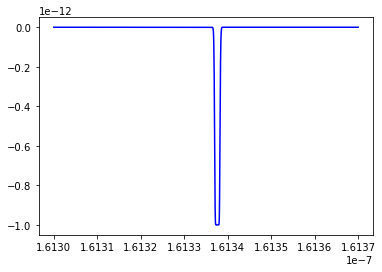

In [16]:
plt.plot(Lambda, Model, "b")


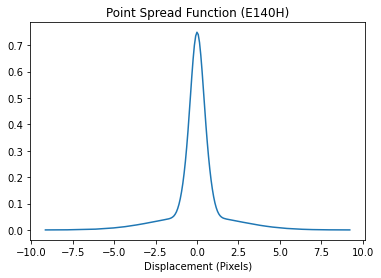

int 1201


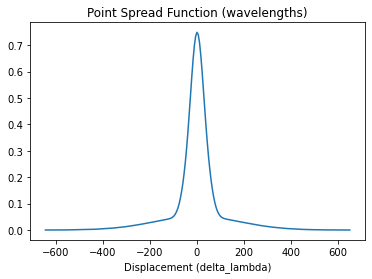

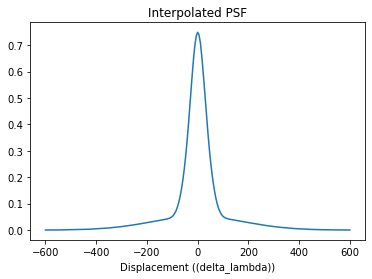

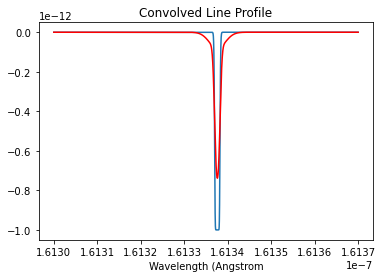

In [19]:
import pylab as plb
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve

pixel_location, spectral_response = [], []
for line in open('PSF.txt', 'r'):
  values = [float(s) for s in line.split()]
  pixel_location.append(values[0])
  spectral_response.append(values[2])

pixel_location = np.array(pixel_location)
spectral = np.array(spectral_response)
plt.plot(pixel_location, spectral)
plt.title('Point Spread Function (E140H)')
plt.xlabel('Displacement (Pixels)')
plt.ylabel('')
plt.show()

for i in (pixel_location):
    p_location = ((pixel_location*(7.04e-13))/(1e-14))
int_pixel_locations= np.arange(-600,601,1)
print('int', len(int_pixel_locations))
plt.plot(p_location, spectral)
plt.title('Point Spread Function (wavelengths)')
plt.xlabel('Displacement (delta_lambda)')
plt.ylabel('')
plt.show()
interpol_function = scipy.interpolate.interp1d(p_location, spectral)
interpolated_spectral_response = interpol_function(int_pixel_locations)

plt.plot(int_pixel_locations, interpolated_spectral_response)
plt.title('Interpolated PSF')
plt.xlabel('Displacement ((delta_lambda))')
plt.ylabel('')
plt.show()

kernel = CustomKernel(interpolated_spectral_response) 
convolved = convolve_fft(Model, kernel, normalize_kernel = True) 
plt.plot(Lambda, Model)
plt.plot(Lambda,convolved, 'r')
plt.title('Convolved Line Profile')
plt.xlabel('Wavelength (Angstrom')
plt.show()

In [20]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sb4
import math
import numpy as np 
from astropy.io import fits
from scipy import interpolate 
import scipy 
import sys
from scipy.ndimage import gaussian_filter1d
from astropy import constants as const
import pylab as plb
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve


file=['oe4v09020_x1d.fits']
date=['FUV']
colors=['royalblue']

for i in np.arange(len(file)):
    x1ddata = fits.getdata(file[i], ext=1)
    norders = len(x1ddata)
    nwavs = len((x1ddata[0]['WAVELENGTH']))
    order = np.arange(norders)
    wave = x1ddata[:]['WAVELENGTH']
    flux = x1ddata[:]['FLUX']
    err = x1ddata[:]['ERROR']

W = (wave[6])
min = 1613
max = 1613.7
wavelength = []
indx1 = []
for j, item in enumerate(W):
    if (item > min).any() and (item < max).any():
        wavelength.append(item)
        indx1.append(j)   
y = indx1
F = (flux[6])
Flux = np.take(F, indx1)
l = np.array(wavelength)
for i in (l):
    observed_lambda = (l*(1e-10))

error = (err[6])
yerr = np.take(error,indx1)

Lambda = np.arange(1613e-10, 1613.7e-10, 1e-14)       
h = 6.62607004*10**-34
k = 1.38e-23
c = 299792458.0
k = 1.38e-23
m = 1.9944235e-26
    
def absorption_model(lambda0_1, T, N, delta_lambda):

    def model(lambda0, A21, g2, g1, N, E1, g1i, g2i, g3i, E1i, E2i, E3i, T):
        energy = []
        E = [E1i, E2i, E3i]
        E = np.array(E)
        gi = [g1i, g2i, g3i]
        gi = np.array(gi)
        kT = ((k*T)/(h*3e10))*1e11
        for j in (E):
            energy.append(np.exp(-j/(kT)))
        e = np.multiply(energy,gi)
        Z = np.sum(e)
        x = (g1i/Z)*(np.exp(-E1i/kT))
        v0 = c/lambda0
        v1 = (c/Lambda)
        for i in (v1):
            diffv = (v0/c)*(math.sqrt((2*k*T)/m))
            d1= ((diffv)**2)
            q1 = (v1-v0)**2
            a1 = -(q1/d1)
            L = 1/(diffv*(math.sqrt(np.pi)))*(np.exp(a1))
        B1 = (2*h*v0**3)/((c)**2)
        B12 = (A21*(g2/g1))/B1
        Depth = ((h*v0)/(4*math.pi))*x*B12*L
        X = -(Depth*N)
        I = 1e-12*(np.exp(X))
        return(I)
    I1 = model(lambda0_1, 3.6e+04, 1, 3, N, 0, 1, 3, 5, 0, 16.4167130, 43.4134567, T)         
    
    Bkg_continuum = 1e-12
    base = np.zeros(7000)
    I1 = I1 - Bkg_continuum
    model1 = np.add(base, I1)
        return(model1)
    model2 = absorption(1613.37599e-10, 300, 30e22)
    Lambda1 = []
    for i in (Lambda):
        Lambda1.append(i+delta_lambda)
    convolved = convolve_fft(model2, kernel, normalize_kernel = True) 
    interpol_function = scipy.interpolate.interp1d(Lambda1, convolved,  fill_value="extrapolate")
    model = interpol_function(observed_lamda) 
    return(model)
final_model = absorption_model(1613.37599e-10, 300, 30e22, 2.5e-12)

IndentationError: unexpected indent (<ipython-input-20-fc31126fe1ff>, line 94)

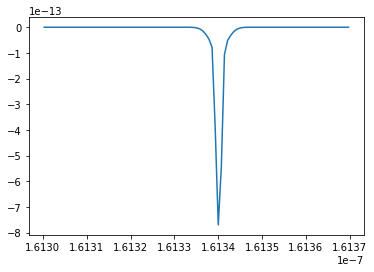

In [211]:
plt.plot(observed_lambda, final_model)

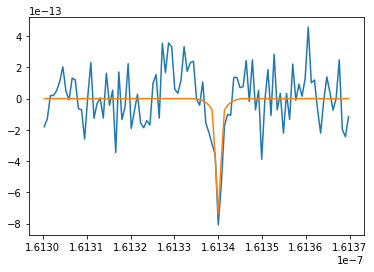

In [21]:
z = np.polyfit(observed_lambda, Flux, 3)
poly = np.poly1d(z)
new_y = poly(observed_lambda)
final_flux = Flux - new_y
plt.plot(observed_lambda, final_flux)

Flux = np.array(Flux)
Flux_index = Flux.argsort()[:1]
lambda0 = 1613.37599e-10
wave_low = np.take(observed_lambda, Flux_index)
delta_lambda = wave_low-lambda0

interpol_function = scipy.interpolate.interp1d(Lambda+delta_lambda, convolved,  fill_value="extrapolate")
polated = interpol_function(observed_lambda)
plt.plot(observed_lambda, polated)



In [22]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sb4
import math
import numpy as np 
from astropy.io import fits
from scipy import interpolate 
import scipy 
import sys
from scipy.ndimage import gaussian_filter1d
from astropy import constants as const
import pylab as plb
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve


file=['oe4v09020_x1d.fits']
date=['FUV']
colors=['royalblue']

for i in np.arange(len(file)):
    x1ddata = fits.getdata(file[i], ext=1)
    norders = len(x1ddata)
    nwavs = len((x1ddata[0]['WAVELENGTH']))
    order = np.arange(norders)
    wave = x1ddata[:]['WAVELENGTH']
    flux = x1ddata[:]['FLUX']
    err = x1ddata[:]['ERROR']

W = (wave[6])
min = 1613
max = 1613.7
wavelength = []
indx1 = []
for j, item in enumerate(W):
    if (item > min).any() and (item < max).any():
        wavelength.append(item)
        indx1.append(j)   
y = indx1
F = (flux[6])
Flux = np.take(F, indx1)
l = np.array(wavelength)
for i in (l):
    observed_lambda = (l*(1e-10))

error = (err[6])
yerr = np.take(error,indx1)

Lambda = np.arange(1613e-10, 1613.7e-10, 1e-14)       
h = 6.62607004*10**-34
k = 1.38e-23
c = 299792458.0
k = 1.38e-23
m = 1.9944235e-26

In [27]:
def log_likelihood(theta, observed_lambda, final_flux, yerr):
    T, N, delta_lambda = theta
    
    def absorption_model(lambda0_1, T, N, delta_lambda):
        def absorption(lambda0_1, T, N):
            def model(lambda0, A21, g2, g1, N, E1, g1i, g2i, g3i, E1i, E2i, E3i, T):
                energy = []
                E = [E1i, E2i, E3i]
                E = np.array(E)
                gi = [g1i, g2i, g3i]
                gi = np.array(gi)
                kT = ((k*T)/(h*3e10))*1e11
                for j in (E):
                    energy.append(np.exp(-j/(kT)))
                e = np.multiply(energy,gi)
                Z = np.sum(e)
                x = (g1i/Z)*(np.exp(-E1i/kT))
                v0 = c/lambda0
                v1 = (c/Lambda)
                for i in (v1):
                    diffv = (v0/c)*(math.sqrt((2*k*T)/m))
                    d1= ((diffv)**2)
                    q1 = (v1-v0)**2
                    a1 = -(q1/d1)
                    L = 1/(diffv*(math.sqrt(np.pi)))*(np.exp(a1))
                B1 = (2*h*v0**3)/((c)**2)
                B12 = (A21*(g2/g1))/B1
                Depth = ((h*v0)/(4*math.pi))*x*B12*L
                X = -(Depth*N)
                I = 1e-12*(np.exp(X))
                return(I)
            I1 = model(lambda0_1, 3.6e+04, 1, 3, N, 0, 1, 3, 5, 0, 16.4167130, 43.4134567, T)         
    
            Bkg_continuum = 1e-12
            base = np.zeros(7000)
            I1 = I1 - Bkg_continuum
            model1 = np.add(base, I1)
            return(model1)
        model2 = absorption(1613.37599e-10, T, N)
        Lambda1 = []
        for i in (Lambda):
            Lambda1.append(i+delta_lambda)
        convolved = convolve_fft(model2, kernel, normalize_kernel = True) 
        interpol_function = scipy.interpolate.interp1d(Lambda1, convolved,  fill_value="extrapolate")
        final_model = interpol_function(observed_lambda) 
        return(final_model)
    model = absorption_model(1613.37599e-10, T, N, delta_lambda)
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((final_flux - model) ** 2 / sigma2 + np.log(sigma2))

In [28]:
from scipy.optimize import minimize
import numpy as np

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([300, 10e22, 2.5e-12])+ 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(observed_lambda, final_flux, yerr))
T_ml, N_ml, delta_lambda_ml = soln.x 

print("Maximum likelihood estimates:")
print("T = {0:.3f}".format(T_ml))
print("N = {0:.3f}".format(N_ml))
print("delta_lambda_ml = {0:.3f}".format(delta_lambda_ml))

Maximum likelihood estimates:
T = 300.050
N = 99999999999999991611392.000
delta_lambda_ml = 0.065


In [30]:
def log_prior(theta):    
    T, N, delta_lambda = theta
    if 1 < T < 500 and 1e19 < N < 1e24 and -5e12 < delta_lambda < 5e12:
        return 0
    return -np.inf

def log_probability(theta, observed_lambda, final_flux, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, observed_lambda, final_flux, yerr)


In [31]:
import emcee

pos = soln.x + np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(observed_lambda, final_flux, yerr))
sampler.run_mcmc(pos, 50, progress=True, skip_initial_state_check=True);

 30%|███       | 15/50 [24:33<47:40, 81.74s/it]  C:\Users\Aoife\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
100%|██████████| 50/50 [1:06:22<00:00, 79.66s/it]


In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "N", "wave_low"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [19]:
tau = sampler.get_autocorr_time()
print(tau)


[nan nan  1.]


C:\Users\Aoife\anaconda3\lib\site-packages\emcee\autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]


In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels
);